# Flight Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)

In [2]:
#Loading the tain data
train_data = pd.read_excel("Data_Train.xlsx")
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
#loading the test data
test_data = pd.read_excel("Test_set.xlsx")
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [4]:
final_data = train_data.append(test_data)
final_data.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873.0
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087.0
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270.0
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087.0
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625.0


In [5]:
#For proceeding further we have to check data type of all the columns
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


In [6]:
day = final_data["Date_of_Journey"].str.split("/").str[0]
date = final_data["Date_of_Journey"].str.split("/").str[1]
year = final_data["Date_of_Journey"].str.split("/").str[2]

#Appending the following values in the final_data
final_data["Journey_Day"] = day
final_data["Journey_Date"] = date
final_data["Journey_Year"] = year


#printing the updates data
final_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Date,Journey_Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [7]:
#As data in date of journey we have so we will drop the column
final_data.drop("Date_of_Journey", axis=1, inplace=True)

In [8]:
#as the type of the new generated columns is onject so now we will convert into int type
final_data["Journey_Day"] = final_data["Journey_Day"].astype(int)
final_data["Journey_Date"] = final_data["Journey_Date"].astype(int)
final_data["Journey_Year"] = final_data["Journey_Year"].astype(int)

In [9]:
duration_hr = final_data["Duration"].str.split(" ").str[0]
duration_min = final_data["Duration"].str.split(" ").str[1]
final_data["Duration_Hr"] = duration_hr
final_data["Duration_Min"] = duration_min

In [10]:
#Here we are removing string charectors from the values and updating columns with integer values
final_data["Duration_Hr"] = final_data["Duration_Hr"].str.split("h").str[0]
final_data["Duration_Min"] = final_data["Duration_Min"].str.split("m").str[0]

In [11]:
#As we have duration data, we will drop the repestive column
final_data.drop("Duration", axis=1, inplace=True)

In [12]:
final_data.tail(5)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Date,Journey_Year,Duration_Hr,Duration_Min
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,1 stop,No info,NaN,6,6,2019,23,55
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,non-stop,No info,NaN,27,3,2019,2,35
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,1 stop,No info,NaN,6,3,2019,6,35
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,1 stop,No info,NaN,6,3,2019,15,15
2670,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,1 stop,No info,NaN,15,6,2019,14,20


In [13]:
final_data[final_data["Duration_Hr"]=='5m']

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Date,Journey_Year,Duration_Hr,Duration_Min
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,16:55,2 stops,No info,17327.0,6,3,2019,5m,NaN
2660,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,16:55,2 stops,No info,NaN,12,3,2019,5m,NaN


In [14]:
#As here 5m value is present we can not convert it into the int so we will drop the respective rows
final_data.drop(6474, axis=0, inplace=True)
final_data.drop(2660, axis=0, inplace=True)

In [15]:
#Here we have replaced all the NaN values by zero as this features was contaning duration in hours only
final_data['Duration_Min'].fillna(0, inplace=True)

In [16]:
#convertinf the data type into int
final_data["Duration_Min"] = final_data["Duration_Min"].astype(int)
final_data["Duration_Hr"] = final_data["Duration_Hr"].astype(int)

In [17]:
#For future analysis we will calculate total duration in min in new column
final_data["Total_Duration_Min"] = final_data["Duration_Hr"]*60 + final_data["Duration_Min"]

In [18]:
final_data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

To make the proper use of total stops data we can do encodinging of the data and can assign numerical values for non_stope = 0 for 1 stop = 1 and so on

Nan values in the Total_Stops column can be replaced by 1 because if we find a mode it is 1_Stop

In [19]:
final_data['Total_Stops']=final_data['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'nan':1})

In [20]:
final_data[final_data["Total_Stops"].isnull()]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Date,Journey_Year,Duration_Hr,Duration_Min,Total_Duration_Min
9039,Air India,Delhi,Cochin,NaN,09:45,09:25 07 May,NaN,No info,7480.0,6,5,2019,23,40,1420


In [21]:
final_data.drop(9039, axis= 0 , inplace=True)

In [22]:
#As we have data of Total stops we can remove Route colum
final_data.drop("Route", axis = 1, inplace=True)


In [23]:
#Our final data will be 
final_data.head(10)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Date,Journey_Year,Duration_Hr,Duration_Min,Total_Duration_Min
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,0.0,No info,3897.0,24,3,2019,2,50,170
1,Air India,Kolkata,Banglore,05:50,13:15,2.0,No info,7662.0,1,5,2019,7,25,445
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,2.0,No info,13882.0,9,6,2019,19,0,1140
3,IndiGo,Kolkata,Banglore,18:05,23:30,1.0,No info,6218.0,12,5,2019,5,25,325
4,IndiGo,Banglore,New Delhi,16:50,21:35,1.0,No info,13302.0,1,3,2019,4,45,285
5,SpiceJet,Kolkata,Banglore,09:00,11:25,0.0,No info,3873.0,24,6,2019,2,25,145
6,Jet Airways,Banglore,New Delhi,18:55,10:25 13 Mar,1.0,In-flight meal not included,11087.0,12,3,2019,15,30,930
7,Jet Airways,Banglore,New Delhi,08:00,05:05 02 Mar,1.0,No info,22270.0,1,3,2019,21,5,1265
8,Jet Airways,Banglore,New Delhi,08:55,10:25 13 Mar,1.0,In-flight meal not included,11087.0,12,3,2019,25,30,1530
9,Multiple carriers,Delhi,Cochin,11:25,19:15,1.0,No info,8625.0,27,5,2019,7,50,470


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

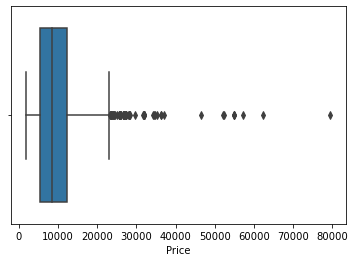

In [24]:
sns.boxplot(final_data["Price"])

Many outliers are present in the data hence we will use median for analysis

In [25]:
data= final_data.copy()
data["Price"].skew()

1.8134124863224663

This skew values should be between -1 and 1 to get the normal distribution of the data. If they are not in range than it indicates many outliers are present in the data and needs to be handled

In [26]:
#Handling The Outliers
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (IQR*whisker_width)
upper_whisker = Q3 + (IQR*whisker_width)
data["Price"] = np.where(data["Price"]>upper_whisker, upper_whisker , np.where(data["Price"]<lower_whisker, lower_whisker, data["Price"]))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

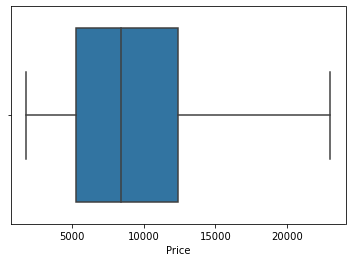

In [27]:
sns.boxplot(data["Price"])

<AxesSubplot:xlabel='Price', ylabel='Count'>

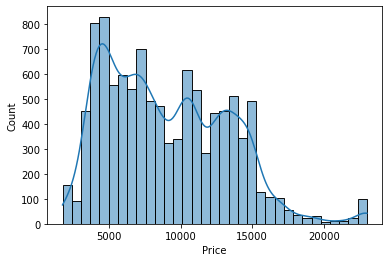

In [28]:
sns.histplot(data['Price'], kde= True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

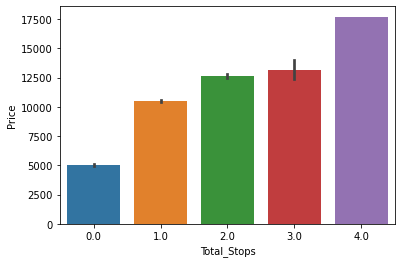

In [29]:
sns.barplot(data["Total_Stops"], data["Price"])

Here we can clearly understand that as number of stops are increasing price is also increasing

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Journey_Day', ylabel='Price'>

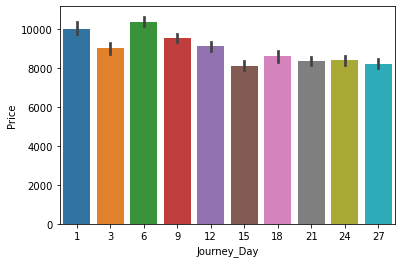

In [30]:
sns.barplot(data["Journey_Day"],data["Price"])

Here it can be oberved that at start of the months prices are at higher level comparing with prices at end of the months

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Journey_Date', ylabel='Price'>

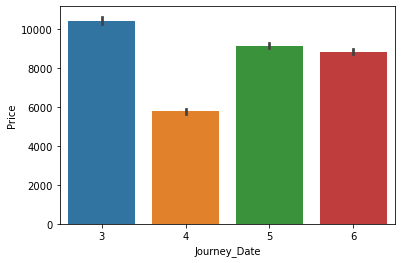

In [31]:
sns.barplot(data["Journey_Date"],data["Price"])

No Specific relation observed in Month of trave and price

In [32]:
data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Date,Journey_Year,Duration_Hr,Duration_Min,Total_Duration_Min
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,0.0,No info,3897.0,24,3,2019,2,50,170
1,Air India,Kolkata,Banglore,05:50,13:15,2.0,No info,7662.0,1,5,2019,7,25,445
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,2.0,No info,13882.0,9,6,2019,19,0,1140
3,IndiGo,Kolkata,Banglore,18:05,23:30,1.0,No info,6218.0,12,5,2019,5,25,325
4,IndiGo,Banglore,New Delhi,16:50,21:35,1.0,No info,13302.0,1,3,2019,4,45,285


#cheaking the prices accoding the airline

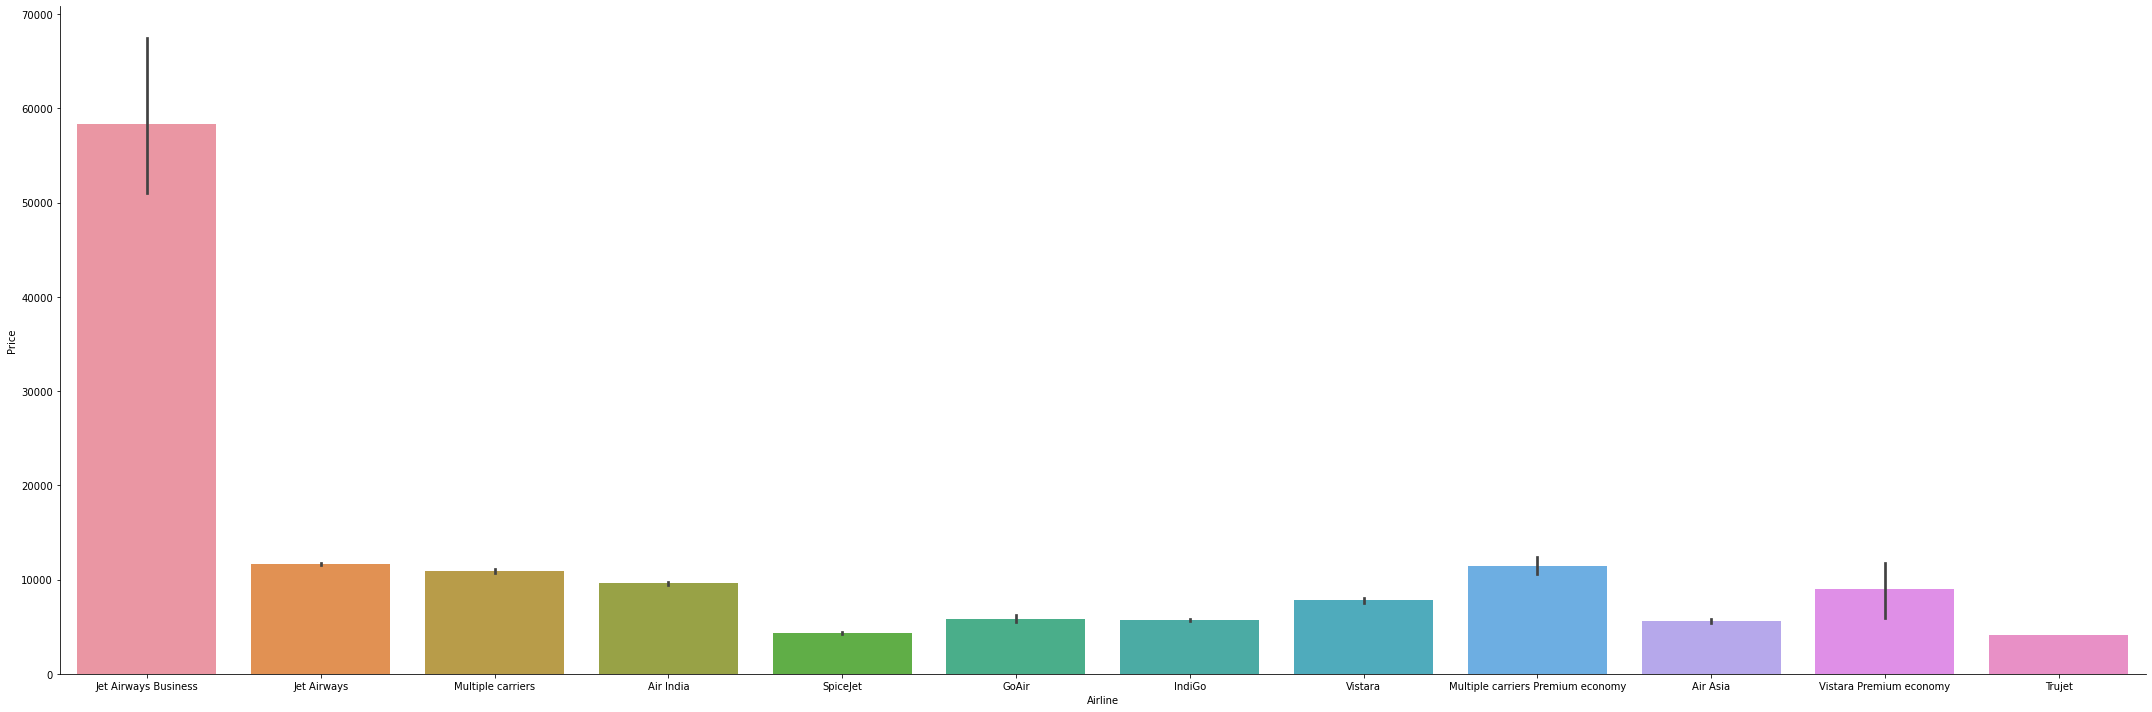

In [33]:
sns.catplot(y = 'Price', x= 'Airline' , data= final_data.sort_values("Price", ascending=False), kind= 'bar', height=10, aspect=3)

<AxesSubplot:xlabel='Dep_Time'>

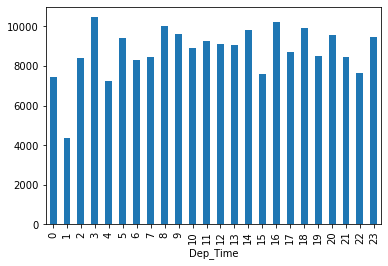

In [40]:
data["Dep_Time"]= pd.to_datetime(data["Dep_Time"], format= '%H:%M')
data.groupby(data["Dep_Time"].dt.hour)["Price"].mean().plot.bar()

Avg price are depends on their departure time

In [52]:
#Min Price
min_price = final_data[final_data["Price"]==final_data["Price"].min()][["Airline", "Source", "Dep_Time", "Total_Stops", "Total_Duration_Min", "Price"]]
min_price

,Airline,Source,Dep_Time,Total_Stops,Total_Duration_Min,Price
4066,SpiceJet,Mumbai,22:45,0.0,85,1759.0
4274,SpiceJet,Mumbai,22:45,0.0,85,1759.0
4839,SpiceJet,Mumbai,22:45,0.0,90,1759.0
10513,SpiceJet,Mumbai,05:45,0.0,80,1759.0


In [59]:
#Max Price
max_price = final_data[final_data['Price']==final_data['Price'].max()][["Airline", "Source", "Dep_Time", "Total_Stops", "Total_Duration_Min", "Price"]]
max_price

,Airline,Source,Dep_Time,Total_Stops,Total_Duration_Min,Price
2924,Jet Airways Business,Banglore,05:45,1.0,340,79512.0


Now we wil handle all categorical columns by one hot encoding metho

In [65]:
airlines = final_data["Airline"]
airlines = pd.get_dummies(airlines, drop_first=True )

In [66]:
airlines

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2666,1,0,0,0,0,0,0,0,0,0,0
2667,0,0,1,0,0,0,0,0,0,0,0
2668,0,0,0,1,0,0,0,0,0,0,0
2669,1,0,0,0,0,0,0,0,0,0,0


In [67]:
Source = final_data["Source"]
Source = pd.get_dummies(Source, drop_first=True)
Source

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0
...,...,...,...,...
2666,0,0,1,0
2667,0,0,1,0
2668,0,1,0,0
2669,0,1,0,0


In [68]:
Destination = final_data["Destination"]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
2666,0,0,0,0,0
2667,0,0,0,0,0
2668,1,0,0,0,0
2669,1,0,0,0,0


In [70]:
Additinal_Info = final_data["Additional_Info"]
Additinal_Info = pd.get_dummies(Additinal_Info, drop_first = True)
Additinal_Info

,1 Short layover,2 Long layover,Business class,Change airports,In-flight meal not included,No Info,No check-in baggage included,No info,Red-eye flight
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
2666,0,0,0,0,0,0,0,1,0
2667,0,0,0,0,0,0,0,1,0
2668,0,0,0,0,0,0,0,1,0
2669,0,0,0,0,0,0,0,1,0


In [75]:
final_data.drop(["Airline", "Source", "Destination", "Additional_Info"] , axis = 1 , inplace = True)

In [79]:
final_Op_Data = pd.concat([final_data,airlines, Source, Destination, Additinal_Info ], axis = 1)

In [80]:
final_Op_Data

,Dep_Time,Arrival_Time,Total_Stops,Price,Journey_Day,Journey_Date,Journey_Year,Duration_Hr,Duration_Min,Total_Duration_Min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,1 Short layover,2 Long layover,Business class,Change airports,In-flight meal not included,No Info,No check-in baggage included,No info,Red-eye flight
0,22:20,01:10 22 Mar,0.0,3897.0,24,3,2019,2,50,170,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,05:50,13:15,2.0,7662.0,1,5,2019,7,25,445,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,09:25,04:25 10 Jun,2.0,13882.0,9,6,2019,19,0,1140,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,18:05,23:30,1.0,6218.0,12,5,2019,5,25,325,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,16:50,21:35,1.0,13302.0,1,3,2019,4,45,285,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,20:30,20:25 07 Jun,1.0,NaN,6,6,2019,23,55,1435,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2667,14:20,16:55,0.0,NaN,27,3,2019,2,35,155,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2668,21:50,04:25 07 Mar,1.0,NaN,6,3,2019,6,35,395,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
2669,04:00,19:15,1.0,NaN,6,3,2019,15,15,915,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
